This notebook simulates upper bounds on the secret key fraction for CVQKD, in the asymptotic limit.
For a reference, see http://www.nature.com/articles/ncomms15043 and http://www.nature.com/articles/s42005-019-0147-3

In [1]:
import numpy
import matplotlib
from matplotlib import pyplot as plt
%matplotlib widget
from matplotlib import font_manager
from ipywidgets import *

In [2]:
#%%
#Close all figures
plt.close('all')
#%%
#General plot settings
default_marker = ""
default_figure_size = (6, 5)
default_fontsize = 32
title_fontsize = default_fontsize
title_font = font_manager.FontProperties(family='Times New Roman',
                                   weight='bold',
                                   style='normal', size=title_fontsize)
axis_font = font_manager.FontProperties(family='Times New Roman',
                                   weight='normal',
                                   style='normal', size=title_fontsize*0.7)
legend_font = font_manager.FontProperties(family='Times New Roman',
                                   weight='normal',
                                   style='normal', size=int(numpy.floor(0.9*title_fontsize)))

# Bounds on the Secret Key Fraction with Repeater Chains in Lossy Channels

In noiseless communications, the maximum communication rate (known as \textit{capacity}) of a lossy channel, partitioned into $L$ lossy channel segments with transmissivities $\{\eta_j\}_{j=1}^{L}$ and interleaved by quantum repeaters, is
\begin{equation}
		\mathcal{C}_{\text{loss}} = -\log_2\left(1-\min_j\{\eta_j\}\right)
\end{equation}
	A particular case is that of $L-1$ ''equally-spaced'' repeaters, i.e., a channel with segments of the same efficiency $\sqrt[L-1]{\eta}$, where $\eta$ is the overall channel efficiency. In this case, one has
\begin{equation}
		\mathcal{C}_{\text{loss}} = -\log_2\left(1-\sqrt[L-1]{\eta}\right)
\end{equation}	

In [3]:
def secret_key_fraction_lossy_channel_bound(*channel_efficiencies):
    """
    Computes Pirandola's bound on the secret key fraction of CVQKD, for a 
    quantum channel partitioned in segments with different efficiencies.
        channel_efficiencies : iterable of float (elements in [0, 1])
            the transmission efficiencies of the channel segments.
    """
    return -numpy.log2(1-numpy.min(channel_efficiencies)) 

In [4]:
def secret_key_fraction_lossy_channel_bound(channel_total_efficiency, L):
    """
    Computes Pirandola's bound on the secret key fraction of CVQKD, for a 
    quantum channel partitioned in segments with equal efficiencies.
        channel_total_efficiency : iterable of float (elements in [0, 1])
            the transmission efficiencies of the channel segments.
    """
    return -numpy.log2(1-(channel_total_efficiency)**(1/L)) 

In [5]:
#Channel efficiencies
eta = numpy.linspace(10**(-10), 1, 100)
fiber_attenuation_coefficient = 0.2 #[dB/km]
eta_to_attenuation_dB = lambda eta: -10*numpy.log10(eta)
attenuation_dB = eta_to_attenuation_dB(eta)
eta_to_distance = lambda eta: eta_to_attenuation_dB(eta)/0.2
distance = eta_to_distance(eta)

In [6]:
"""
Evaluate the PLOB repeaterless (L=1), the single-repeater (L=2) and the two-repeater bounds (L=3). 
"""
L_values = numpy.arange(3)+1 #number of channel segments
secret_key_fraction_bounds = dict(zip(L_values, [None for j in range(len(L_values))]))
for L in L_values:
    secret_key_fraction_bounds[L] = secret_key_fraction_lossy_channel_bound(eta, L)

/tmp/ipykernel_23426/3294305182.py:8: RuntimeWarning: divide by zero encountered in log2
  return -numpy.log2(1-(channel_total_efficiency)**(1/L))


/tmp/ipykernel_23426/1280225775.py:23: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axis_secret_key_fraction.semilogy(attenuation_dB, \


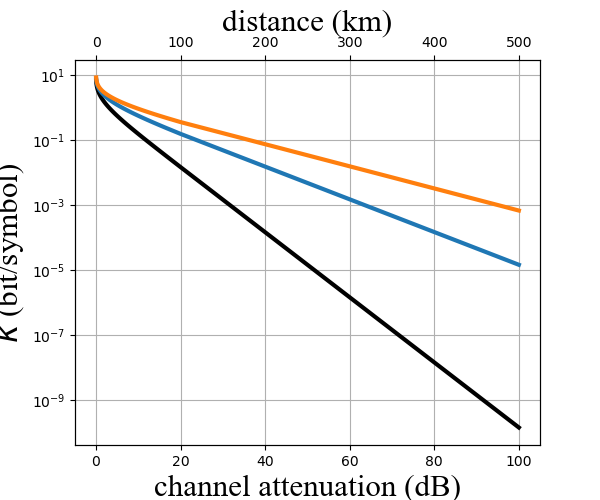

In [7]:
"""
Plot the PLOB repeaterless (L=1), the single-repeater (L=2) and the two-repeater bounds (L=3). 
"""
figure = plt.figure(num="QKD system performance VS distance", figsize = default_figure_size)
figure.subplots_adjust(wspace=0.8, hspace=0.7) 
#Secret key fraction plot
axis_secret_key_fraction = figure.add_subplot(1, 1, 1)
axis_secret_key_fraction.set_xlabel("channel attenuation (dB)", font=axis_font)
axis_secret_key_fraction.set_ylabel("$\kappa$ (bit/symbol)", font=axis_font)
axis_distance = axis_secret_key_fraction.twiny()
axis_distance.set_xlabel("distance (km)", font=axis_font)
axis_distance.plot(distance, numpy.zeros((len(eta), )))
axis_secret_key_fraction.grid(True)
colors = dict(zip(L_values, ["black", "tab:blue", "tab:orange"]))
for L in L_values:
    label = ""
    if L == 1:
        label = "repeaterless bound"
    elif L == 2:
        label = "single-repeater bound"
    else:
        label = "L = %d"%L
    axis_secret_key_fraction.semilogy(attenuation_dB, \
                                      secret_key_fraction_bounds[L], label=label, \
                                      color=colors[L], linewidth=3)

In [8]:
figure.savefig("secret-key-rates_repeater-bounds.pdf")